In [11]:
%matplotlib inline
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
import sympy as syms

#import x,y, and strength information for NACA0012 Airfoil

NACA_sig  = np.loadtxt('NACA0012_sigma.txt')
NACA_x = np.loadtxt('NACA0012_x.txt')
NACA_y =np.loadtxt('NACA0012_y.txt')

#Define mesh parameters

N = 51
x_start, x_end = -1,2
y_start, y_end = -0.5,0.5
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)



In [41]:
# ombient flow rate
u_inf =1.0

#define velocity function
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a sources along the airfoil by using superposition
    
    Parameters
    ----------
    strength: float
        Strength of the all sources along the airfoil
    xs: float
        x-coordinates of the sources along the airfoil
    ys: float
        y-coordinates of the sources along the airfoil
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    U: 2D Numpy array of floats
        x-component of the velocity vector field.
    V: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    
    i = np.zeros((100,1),dtype=float)
    u = np.zeros((51,51,100),dtype=float)
    v = np.zeros((51,51,100),dtype=float)
    U = np.zeros((51,51),dtype=float)
    V = np.zeros((51,51),dtype=float)
    
    
    for i in range (0,99):
        u[:,:,i] = (strength[i] / (2 * np.pi)) * (X - xs[i]) / ((X - xs[i])**2 + (Y - ys[i])**2)
        v[:,:,i] = (strength[i] / (2 * np.pi)) * (Y - ys[i]) / ((X - xs[i])**2 + (Y - ys[i])**2)
        U = u[:,:,i]+ U
        V = v[:,:,i]+ V
    
    
    return U, V



In [42]:
#define total velocities by the x and y components
u_source,v_source = get_velocity(NACA_sig, NACA_x,NACA_y,X,Y)

u = u_inf + u_source
v = v_source




In [48]:
#define stream function function
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by all sources along the arfoil by using superposition
    
    Parameters
    ----------
    strength: float
        Strength of the sources along the airfoil
    xs: float
        x-coordinates of all the scoures along the airfoil
    ys: float
        y-coordinates of all the scoures along the airfoil
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    PSI: 2D Numpy array of floats
        The stream-function.
    """
    i = np.zeros((100,1),dtype=float)
    psi = np.zeros((51,51,100),dtype=float)
    PSI = np.zeros((51,51),dtype=float)
    for i in range (0,99):
        psi[:,:,i] = strength[i] / (2 * np.pi) * np.arctan2((Y - ys[i]), (X - xs[i]))
        PSI = psi[:,:,i] + PSI
    
    return PSI

In [49]:
psi = get_stream_function(NACA_sig,NACA_x,NACA_y,X,Y)

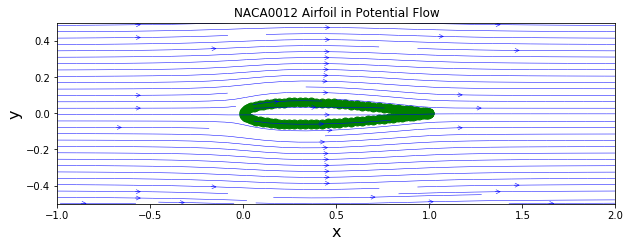

In [59]:
# plot streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.title('NACA0012 Airfoil in Potential Flow')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=1, linewidth=0.5, arrowsize=1, arrowstyle='->', color ='blue')
plt.scatter(NACA_x, NACA_y, color='green', s=80, marker='o')

In [54]:
#define coefficient of pressure
cp = 1 - (u**2+v**2)/u_inf**2

In [56]:
#call maximum value of Cp
np.max(cp)

0.47187837512752451

In [57]:
#find indicies where Cp is largest
np.where(cp==np.max(cp))

(array([25]), array([16]))